# EDA (Exploratory Data Analysis) con Python

# Análisis de Infracciones en Madrid 2020

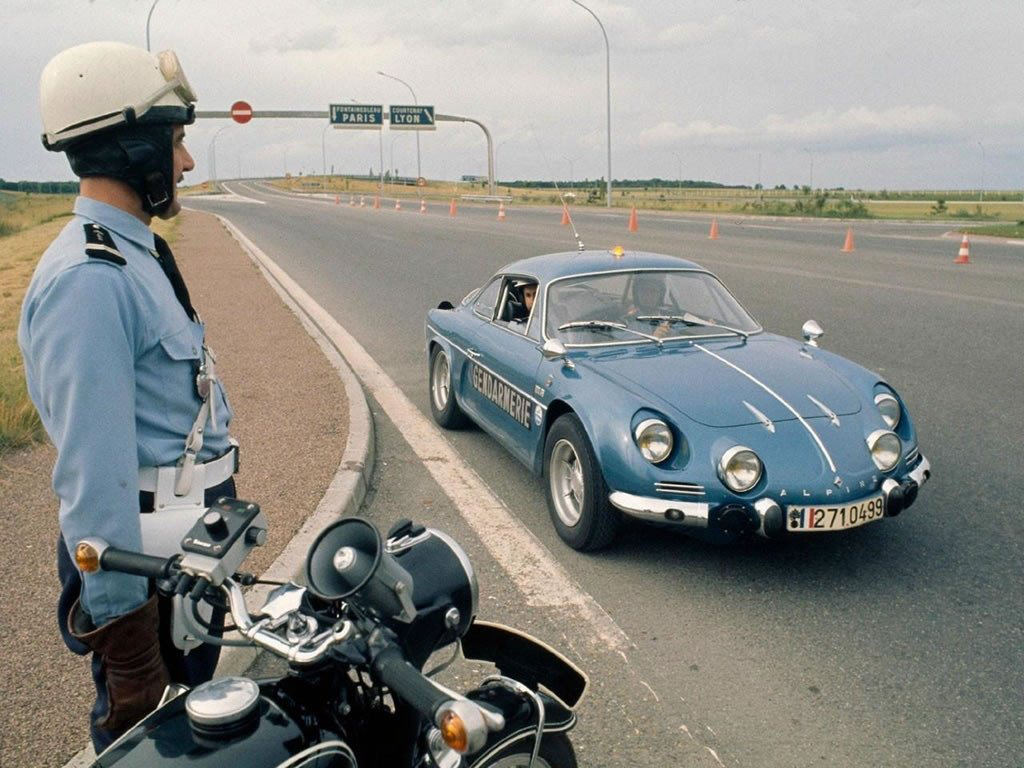

In [1]:
# Importar image
import IPython.display as display
from PIL import Image
display.display(Image.open('multas.jpg'))
# url img = https://www.auto10.com/reportajes/multas-que-pasa-cuando-multan-al-conductor-y-no-es-el-propietario-del-coche/982

In [2]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotnine as ggplot
from plotnine import *
import seaborn as sns

# 1. Une los doce dataframe desde Enero a Diciembre 2020 en un único dataframe. Muestra el shape total del dataframe resultante.

Dataset url = https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

In [3]:
# Leer los archivos csv y concatenar
names=['CALIFICACION','LUGAR','MES','ANIO','HORA','IMP_BOL','DESCUENTO',
       'PUNTOS','DENUNCIANTE','HECHO-BOL','VEL_LIMITE','VEL_CIRCULA', 'COORDENADA_X', 'COORDENADA_Y']

multa1 = pd.read_csv('202001_detalle.csv', delimiter =";", encoding="latin1", header=0, names=names )
multa2 = pd.read_csv('202002_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa3 = pd.read_csv('202003_detalle.csv', delimiter =";", encoding="latin1", header=0, names=names  )
multa4 = pd.read_csv('202004_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa5 = pd.read_csv('202005_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa6 = pd.read_csv('202006_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa7 = pd.read_csv('202007_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa8 = pd.read_csv('202008_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa9 = pd.read_csv('202009_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa10 = pd.read_csv('202010_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa11 = pd.read_csv('202011_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )
multa12 = pd.read_csv('202012_detalle.csv', delimiter =";", encoding="latin1" , header=0, names=names )

lista_csv_multas = pd.concat([multa1,multa2,multa3,multa4,multa5,multa6,multa7,multa8,multa9,multa10,multa11,multa12], ignore_index= True)
lista_csv_multas.shape

C:\Users\garci\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.


(1993304, 14)

# 2. Como tal, no vamos a trabajar con datos geográficos, borra las columnas COORDENADA_X y COORDENADA_Y.

In [4]:
#Borramos las columnas que sean de coordenadas
for col in lista_csv_multas:
        if "COORDENADA" in col:
            lista_csv_multas.drop(col,1,inplace=True)

In [5]:
# Longitud de los datos
len(lista_csv_multas)

1993304

In [6]:
# Hacer un DataFrame
df = pd.DataFrame(lista_csv_multas)
df

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,
...,...,...,...,...,...,...,...,...,...,...,...,...
1993299,LEVE,CL PADRE DAMIAN 19,12,2020,14.14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,
1993300,LEVE,CL JUAN RAMON JIMENEZ 2,12,2020,14.23,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,,
1993301,LEVE,CL JUAN RAMON JIMENEZ 15,12,2020,14.30,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,
1993302,LEVE,CL VICTOR DE LA SERNA 1,12,2020,9.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,


# 3. Revisa los valores únicos de las variables, hay algunas de ellas que no tienen valores únicos por lo que son constantes ¿merece la pena tenerlas en el dataframe?

In [7]:
# Mostrar las 7 primeras líneas del df 
df.head(7)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,
5,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.02,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,
6,LEVE,VIRGEN DE LLUC 70,1,2020,12.16,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,


In [8]:
# Buscar valores nulos
print ('Estos son los valores únicos:')

for i in range(0,df.shape[1]):

    print(df[str(df.columns[i])].unique())

Estos son los valores únicos:
['GRAVE     ' 'LEVE      ' 'MUY GRAVE ']
['ALFONSO XII                             '
 'AV BADAJOZ 5                            '
 'ARISTOTELES 7 POSTERIOR                 ' ...
 'CL LONDRES 36                           '
 'PZ TORRELODONES 6                       '
 'CL PADRE CLARET 1                       ']
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[2020]
[12.18  9.46 13.55 ...  5.46  3.02  5.06]
[ 200.   90.   60.   30.  500.  100.  300.   50. 1000.  400.]
['SI']
[3 0 4 6 2]
['POLICIA MUNICIPAL   ' 'SER                 ' 'AGENTES DE MOVILIDAD'
 'SACE                ']
['CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVIL, NAVEGADOR O SISTEMA DE COMUNICACIÓN ODETECCIÓN DE RADAR.                    '
 'ESTACIONAR EN DOBLE FILA.                                                                                                    '
 'ESTACIONAR EN LUGAR PROHIBIDO.                                                                                               '
 ...
 'CON

# 4. Parece que las columnas VEL_LIMITE y, VEL_CIRCULA tienen valores vacíos, esto se debe a que, si la infracción no se produjo por rebasar ningún límite de velocidad, este valor aparece vacío, cambia todas las anomalías que detectes por nulo.

In [9]:
# Verificar se tiene nulos
df.isna().sum()

CALIFICACION    0
LUGAR           0
MES             0
ANIO            0
HORA            0
IMP_BOL         0
DESCUENTO       0
PUNTOS          0
DENUNCIANTE     0
HECHO-BOL       0
VEL_LIMITE      0
VEL_CIRCULA     0
dtype: int64

In [10]:
# Importa la librería regex para buscar valores nulos y cambiar para NA
import re

#df = df.replace('   ', np.nan) -- otra opcion de cambiar nulos 

nulos = r'^\s*$'

df.replace(to_replace= nulos , value = pd.NA ,inplace=True,regex=True)

df.head()

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,<NA>,<NA>
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,<NA>,<NA>
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,<NA>,<NA>
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,<NA>,<NA>
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,<NA>,<NA>


In [11]:
# Mostrar valores nulos
df.isna().sum()

CALIFICACION          0
LUGAR                 0
MES                   0
ANIO                  0
HORA                  0
IMP_BOL               0
DESCUENTO             0
PUNTOS                0
DENUNCIANTE           0
HECHO-BOL             0
VEL_LIMITE      1549853
VEL_CIRCULA     1549853
dtype: int64

# 5. Las dos columnas VEL_LIMITE y, VEL_CIRCULA pese a ser dos columnas puramente numéricas, se reconocen como tipo "object", revisa la frecuencia de valores, verás que se cuentan como cadenas de texto, por lo tanto:

In [12]:
# Verificar los tipos de columnas
df.dtypes

CALIFICACION     object
LUGAR            object
MES               int64
ANIO              int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS            int64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE       object
VEL_CIRCULA      object
dtype: object

# 5.1 Cambia los nulos de las dos variables por 0

In [13]:
# Cambiar los nulos por 0
df = df.replace(np.nan,0)
df.head(5)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,0,0
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,0,0


# 5.2 Cambia el tipo de la variable a numérico

In [14]:
df = df.astype({'VEL_LIMITE': 'int32', 'VEL_CIRCULA': 'int32'})
df.dtypes

CALIFICACION     object
LUGAR            object
MES               int64
ANIO              int64
HORA            float64
IMP_BOL         float64
DESCUENTO        object
PUNTOS            int64
DENUNCIANTE      object
HECHO-BOL        object
VEL_LIMITE        int32
VEL_CIRCULA       int32
dtype: object

# 5.3 ¿Cuál es la velocidad límite más repetida distinto de cero?

In [15]:
print ('La velocidad límite más repetida es: ')
df['VEL_LIMITE'].value_counts()[df['VEL_LIMITE'].value_counts().index!=0]

La velocidad límite más repetida es: 


70    266321
90     94402
50     73036
80      3688
40      2472
60      2188
30      1343
20         1
Name: VEL_LIMITE, dtype: int64

# 6. Genera una nueva columna llamada DIFERENCIA_KMH que sea el resultado de restar a cada valor de la velocidad a la que circulaba el conductor la velocidad límite en la que se produce la infracción, obtén un top 10 de los conductores que rebasaron los límites a mayor velocidad.

In [16]:
# Generar nueva columna
df['DIFERENCIA_KMH'] = df['VEL_CIRCULA'] - df['VEL_LIMITE']
print ("Los 10 conductores con mayor velocidad: ")
df.sort_values("VEL_CIRCULA", ascending=False).head(10)

Los 10 conductores con mayor velocidad: 


,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
1671450,GRAVE,"M 30 KM 6,700 CR 3 CALZADA 1",11,2020,7.53,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
1293087,GRAVE,"M 30 KM 7,800 CALZADA 2",9,2020,1.11,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
293196,GRAVE,M 30 KM 27 DECRECIENTE C 2,2,2020,4.57,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
1480910,GRAVE,M 30 KM 27 CARRIL 2 CALZADA 2,10,2020,2.11,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
913637,GRAVE,"M 30 KM 0,500 CALZADA 1",7,2020,5.26,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
1480909,GRAVE,"M 30 KM 6,700 CALZADA 1 CR 3",10,2020,2.06,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
1597894,GRAVE,M-30 CALZADA 2 KM 27.000,10,2020,23.53,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,158,68
1403977,GRAVE,"M-30 C-2 KM 7,800 CR-IZDO",9,2020,5.06,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,158,68
1196019,GRAVE,M-30 CALZADA 2 KM 27.000,8,2020,5.42,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,158,68
548586,GRAVE,M-30 CALZADA 2 KM 27.000,3,2020,23.03,500.0,SI,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,157,67


# 7. Obtén un dataframe filtrado por todas las denuncias que hayan acarreado retirada de puntos (es decir, puntos distintos de cero). Agrupa el dataframe filtrado por el agente público que emite la denuncia, ¿cuál de todos los agentes públicos tiene una mayor media de retirada de puntos?

In [17]:
# Filtrar por retirada de puntos
puntos = df['PUNTOS'] != 0
df2 = df[puntos]
print ('Agentes públicos con mayor media de retirada de puntos:')
#Agrupar
df2.groupby(by=['DENUNCIANTE']).sum()['PUNTOS']

Agentes públicos con mayor media de retirada de puntos:


DENUNCIANTE
AGENTES DE MOVILIDAD     68437
POLICIA MUNICIPAL       134163
Name: PUNTOS, dtype: int64

### Agentes con mayor retirada de puntos es la Policia Municipal, con 134.163.

# 8. De la columna hora elimina la parte decimal, muestra de forma gráfica en qué horas se han producido más multas.


In [18]:
#Verificar como está la columna hora
df.head(5)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,0,0,0
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0,0
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0,0
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,0,0,0


In [19]:
# Transformacion de hora en decimal, verificar como se quedó
df = df.round({'HORA':0})
df.head(5)

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFERENCIA_KMH
0,GRAVE,ALFONSO XII,1,2020,12.0,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0
1,GRAVE,AV BADAJOZ 5,1,2020,9.0,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,0,0,0
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.0,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0,0
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.0,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,0,0,0
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.0,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,0,0,0


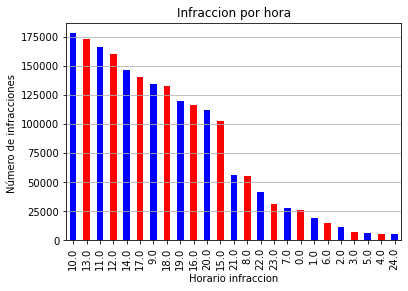

In [20]:
# Grafo por hora, ordenado por la hora de mayor infraccion para menor 
df['HORA'].value_counts().plot(kind="bar",color=["blue","red"])
plt.grid(axis="y")
plt.ylabel("Número de infracciones ")
plt.xlabel("Horario infraccion")
plt.title("Infraccion por hora")
plt.show()  

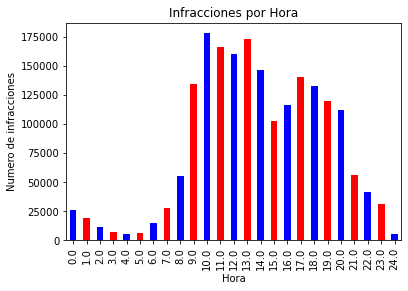

In [21]:
# Grafo por hora, ordenado por hora ascendiente
grafo1 = df['HORA'].value_counts().sort_index()
grafo1.plot(kind='bar',color=["blue","red"])
plt.title('Infracciones por Hora')
plt.ylabel('Numero de infracciones')
plt.xlabel('Hora')
plt.show()

# 9. Muestra de forma gráfica las multas realizadas durante los meses de 2020. Sabiendo que el confinamiento en España inició en marzo de ese año, ¿se nota el efecto de la pandemia?

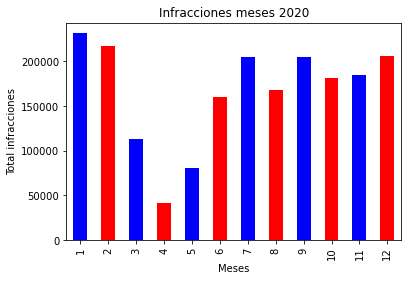

In [22]:
# Grafico de multas realizadas en el año de 2020
grafo = df['MES'].value_counts().sort_index()
grafo.plot(kind='bar',color=["blue", "red"])
plt.title('Infracciones meses 2020')
plt.ylabel('Total infracciones')
plt.xlabel('Meses')
plt.show()

C:\Users\garci\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='MES', ylabel='Density'>

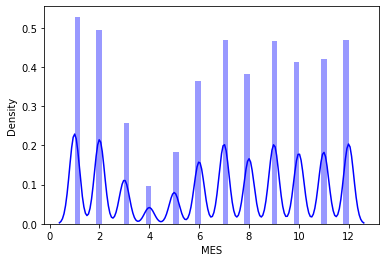

In [23]:
# Grafico de multas realizadas en el año de 2020
import seaborn as sns
sns.distplot(a=df['MES'], color='blue')

### Se nota gran bajada de multas por efecto de la pandemia, donde abril fue el mes con menos registros de multas.

# 10. Muestra el número de infracciones (sin frecuencia acumulada), de cada uno de los agentes públicos en función de la calificación de la infracción

In [24]:
print ('Número de infracciones de los agentes públicos en función de la calificación de la infracción:')
df.groupby(by=['DENUNCIANTE','CALIFICACION']).count()['LUGAR'].sort_index

Número de infracciones de los agentes públicos en función de la calificación de la infracción:


<bound method Series.sort_index of DENUNCIANTE           CALIFICACION
AGENTES DE MOVILIDAD  GRAVE            77830
                      LEVE            625007
                      MUY GRAVE          128
POLICIA MUNICIPAL     GRAVE           486326
                      LEVE             88613
                      MUY GRAVE         5746
SACE                  GRAVE            11338
                      LEVE              2588
SER                   GRAVE            27689
                      LEVE            668039
Name: LUGAR, dtype: int64>

Infracciones totales por agente público:


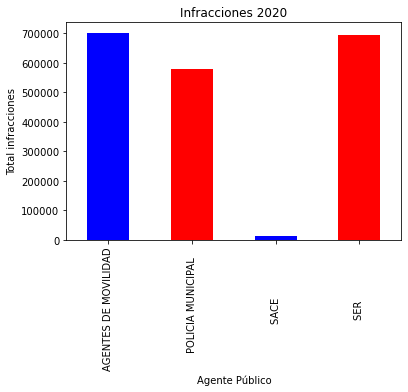

In [25]:
print('Infracciones totales por agente público:')
grafo = df['DENUNCIANTE'].value_counts().sort_index()
grafo.plot(kind='bar',color=["blue", "red"])
plt.title('Infracciones 2020')
plt.ylabel('Total infracciones')
plt.xlabel('Agente Público')
plt.show()

## Infraciones por Agentes Públicos y Calificación

In [26]:
df_final=pd.crosstab(df.CALIFICACION, df.DENUNCIANTE)
df_final

DENUNCIANTE,AGENTES DE MOVILIDAD,POLICIA MUNICIPAL,SACE,SER
CALIFICACION,,,,
GRAVE,77830,486326,11338,27689
LEVE,625007,88613,2588,668039
MUY GRAVE,128,5746,0,0


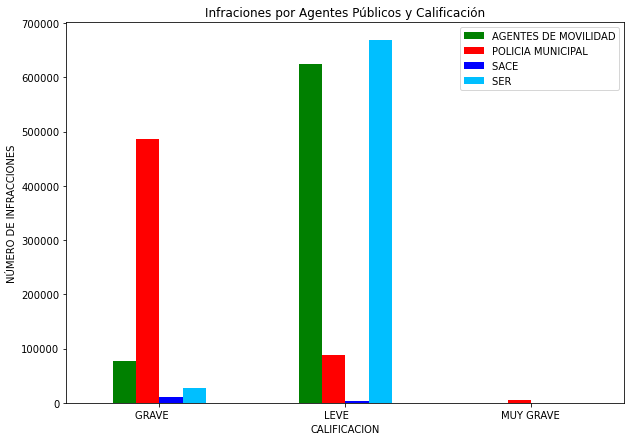

In [27]:
ax=df_final.plot(kind='bar', color=['green','red', 'blue','deepskyblue'])
fig = ax.get_figure()

fig.set_size_inches(10,7)
fig.color='red'

ax.set_xlabel('DENUNCIANTE')
ax.set_ylabel('CALIFICACION')

plt.ylabel('NÚMERO DE INFRACCIONES')
plt.xlabel('CALIFICACION')
plt.title('Infraciones por Agentes Públicos y Calificación')
plt.xticks(rotation=360)
plt.legend()

plt.show()

## Autor: Raquel Garcia Soares
## Fecha: 10/03/2022